In [201]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime # manipulating date formats
%matplotlib inline

import statsmodels.api as sm

from pandas import DataFrame 
import warnings
warnings.filterwarnings("ignore")

# 1: Get the Data

In [202]:
# Load all data sets
items_cat = pd.read_csv("C:/Users/Anthony/Desktop/Jeannette - Machine Learning/term project/data/all/item_categories.csv")
items = pd.read_csv("C:/Users/Anthony/Desktop/Jeannette - Machine Learning/term project/data/all/items.csv")
shops = pd.read_csv("C:/Users/Anthony/Desktop/Jeannette - Machine Learning/term project/data/all/shops.csv")
sales_train = pd.read_csv("C:/Users/Anthony/Desktop/Jeannette - Machine Learning/term project/data/all/sales_train_v2.csv")
sample_submission = pd.read_csv("C:/Users/Anthony/Desktop/Jeannette - Machine Learning/term project/data/all/sample_submission.csv")
test = pd.read_csv("C:/Users/Anthony/Desktop/Jeannette - Machine Learning/term project/data/all/test.csv")

In [203]:
print(items_cat.info())
print(items.info())
print(shops.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None


In [204]:
# Create a copy of the original data
df = sales_train.copy()
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [205]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


**Observations:**
- date column is type object. It needs to be formatted to datetime.
- date column is DD-MM-YYY format. It needs to be changed to YYY-MM-DD.
- Time Series data must have a datetime index. It needs to be transformed.

In [206]:
# Formatting the date column correctly
df.date=df.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))
# check
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
None


In [207]:
df.index

RangeIndex(start=0, stop=2935849, step=1)

In [208]:
#Transforming index into DatetimeIndex
df.index = df['date']
df.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-05', '2013-01-06',
               '2013-01-15', '2013-01-10', '2013-01-02', '2013-01-04',
               '2013-01-11', '2013-01-03',
               ...
               '2015-10-24', '2015-10-31', '2015-10-11', '2015-10-10',
               '2015-10-09', '2015-10-10', '2015-10-09', '2015-10-14',
               '2015-10-22', '2015-10-03'],
              dtype='datetime64[ns]', name='date', length=2935849, freq=None)

In [209]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,,
2013-01-02,2013-01-02,0,59,22154,999.00,1.0
2013-01-03,2013-01-03,0,25,2552,899.00,1.0
2013-01-05,2013-01-05,0,25,2552,899.00,-1.0
2013-01-06,2013-01-06,0,25,2554,1709.05,1.0
2013-01-15,2013-01-15,0,25,2555,1099.00,1.0


# 2: Explore the Data

In [210]:
# Create a copy for data exploration/manipulation
ts = pd.DataFrame()

# Create an univariate DataFrame and group by month and sum item_cnt_day column
ts['item_cnt_day'] = df.item_cnt_day.resample('M').sum()
ts.head()

,item_cnt_day
date,
2013-01-31,131479.0
2013-02-28,128090.0
2013-03-31,147142.0
2013-04-30,107190.0
2013-05-31,106970.0


In [211]:
# To be used later
ts2 = ts.copy()

In [212]:
# Transforming from DataFrame to Series
ts = ts["item_cnt_day"]
ts

date
2013-01-31    131479.0
2013-02-28    128090.0
2013-03-31    147142.0
2013-04-30    107190.0
2013-05-31    106970.0
2013-06-30    125381.0
2013-07-31    116966.0
2013-08-31    125291.0
2013-09-30    133332.0
2013-10-31    127541.0
2013-11-30    130009.0
2013-12-31    183342.0
2014-01-31    116899.0
2014-02-28    109687.0
2014-03-31    115297.0
2014-04-30     96556.0
2014-05-31     97790.0
2014-06-30     97429.0
2014-07-31     91280.0
2014-08-31    102721.0
2014-09-30     99208.0
2014-10-31    107422.0
2014-11-30    117845.0
2014-12-31    168755.0
2015-01-31    110971.0
2015-02-28     84198.0
2015-03-31     82014.0
2015-04-30     77827.0
2015-05-31     72295.0
2015-06-30     64114.0
2015-07-31     63187.0
2015-08-31     66079.0
2015-09-30     72843.0
2015-10-31     71056.0
Freq: M, Name: item_cnt_day, dtype: float64

## Plot TS

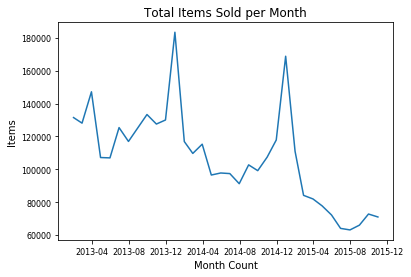

In [213]:
plt.title('Total Items Sold per Month')
plt.xlabel('Month Count')
plt.ylabel('Items')
plt.yticks(size = 8)
plt.xticks(size = 8)
plt.plot(ts);

**Observations:**
- There's a downward trend. Amount of items sold has been decreasing over time.
- There's seasonality. Amount of items sold increases near the end of the year during the holiday season.   

# 3: Time Series Analysis

## TS Decomposition

- **Trend:** Overall direction of the series i.e. upwards, downwards etc.
- **Seasonality:** Monthly or quarterly patterns.
- **Irregular remainder:** Random noise left after extraction of all the components.

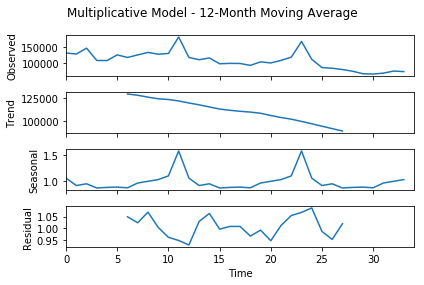

In [214]:
# Multiplicative Model - 12-Month Moving Average
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()
fig.suptitle('Multiplicative Model - 12-Month Moving Average')
fig.subplots_adjust(top=0.88)

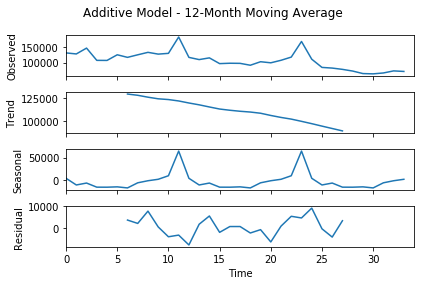

In [215]:
# Additive Model - 12-Month Moving Average
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()
fig.suptitle('Additive Model - 12-Month Moving Average')
fig.subplots_adjust(top=0.88)

## Stationarity Test

**Dickey-Fuller test:**
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [216]:
def rolling_stats(ts):
    plt.yticks(size = 8)
    plt.xticks(size = 8)
    
    plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
    plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling Std');
    plt.title('12-Month Moving Average')
    plt.legend();

In [217]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    plt.yticks(size = 8)
    plt.xticks(size = 8)
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

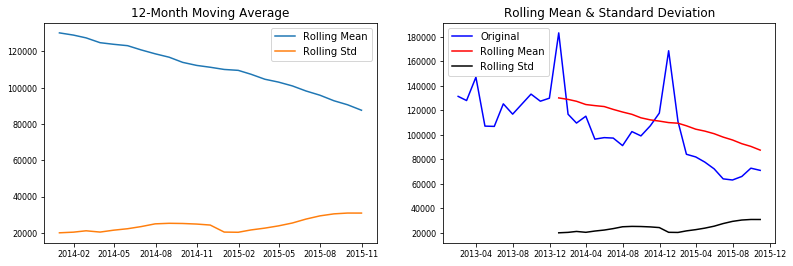

Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [218]:
# Original Data
plt.figure(figsize=(13.1,8.9))

plt.subplot(221)
rolling_stats(ts)

plt.subplot(222)
test_stationarity(ts)

**Observations:**
- Variation in std is small, however, mean is decreasing with time so the original data is **NOT** a stationary series.
- p-value is higher than 0.05 and the test statistic value falls outside 5% of the critical value corroborating that the original data is **NOT** stationary.

### Eliminating Trend and Seasonality with Differencing

- **Trend:** Varying mean over time.
- **Seasonality:** Variations at specific time-frames.

In [219]:
# to remove trend
from pandas import Series as Series

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [220]:
def detrended_deseasonalized_plots (ts):
    
    plt.figure(figsize=(6,12))
    
    plt.subplot(311)
    plt.yticks(size = 8)
    plt.xticks(size = 8)
    plt.title('Original')
    plt.xlabel('Month Count')
    plt.ylabel('Items')
    plt.plot(ts)

    plt.subplot(312)
    plt.title('After De-trend')
    plt.xlabel('Month Count')
    plt.ylabel('Items')
    detrended_ts=difference(ts)
    plt.plot(detrended_ts)
    plt.plot()

    plt.subplot(313)
    plt.title('After De-seasonalization')
    plt.xlabel('Month Count')
    plt.ylabel('Items')
    deseasonalized_ts=difference(ts,12)       # assuming the seasonality is 12 months long
    plt.plot(deseasonalized_ts)
    plt.plot()

    plt.tight_layout()

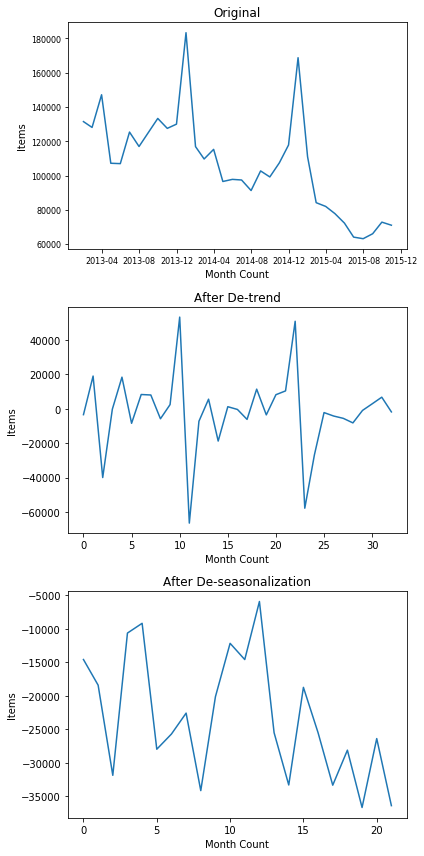

In [221]:
detrended_deseasonalized_plots(ts)

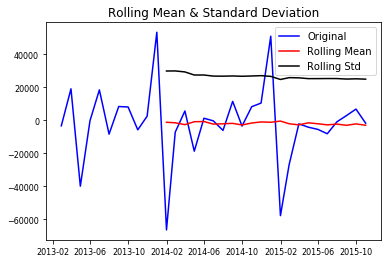

Results of Dickey-Fuller Test:
Test Statistic                -1.363622e+01
p-value                        1.686395e-25
#Lags Used                     1.000000e+01
Number of Observations Used    2.200000e+01
Critical Value (1%)           -3.769733e+00
Critical Value (5%)           -3.005426e+00
Critical Value (10%)          -2.642501e+00
dtype: float64


In [222]:
detrended_ts = ts - ts.shift()
detrended_ts.dropna(inplace=True)

test_stationarity(detrended_ts)

**Observations:**

- De-trended data looks like a stationary series as it has the same variation and mean and std do not have much variance. At this point, based on the graph, it looks like the de-trended data can be stationary. However:

- p-value is higher than 0.05 and the test statistic value falls outside 10% of the critical value which means the de-trended data is **NOT** stationary.

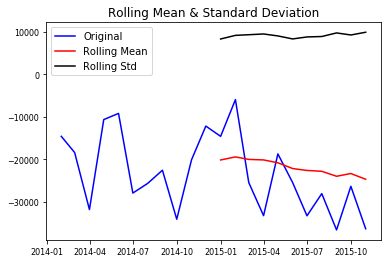

Results of Dickey-Fuller Test:
Test Statistic                 -3.270101
p-value                         0.016269
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [223]:
deseasonalized_ts = ts - ts.shift(12)

deseasonalized_ts.dropna(inplace=True)
test_stationarity(deseasonalized_ts)

**Observations:**

- Mean and std have small variations with time. Mean has a slight downward trend.
- p-value is less than 0.05 and the test statistic value is smaller than 5% of the critical value so we can say with 95% confidence that the de-seasonalized data **IS** a stationary series.

## Plot ACF and PACF to identify potential AR and MA model

In [224]:
stationary_ts = deseasonalized_ts
stationary_ts.head()

date
2014-01-31   -14580.0
2014-02-28   -18403.0
2014-03-31   -31845.0
2014-04-30   -10634.0
2014-05-31    -9180.0
Freq: M, Name: item_cnt_day, dtype: float64

In [225]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(stationary_ts, nlags=12)
lag_pacf = pacf(stationary_ts, nlags=12, method='ols')

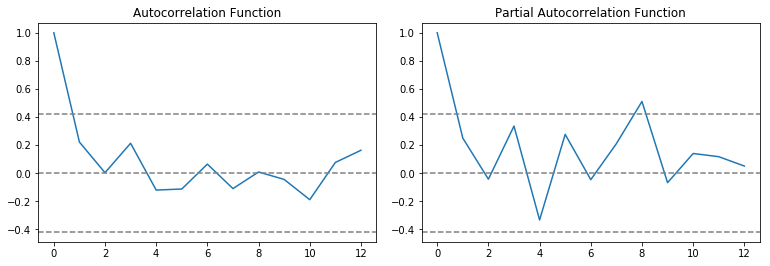

In [226]:
plt.figure(figsize=(10.8,3.8))

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(stationary_ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(stationary_ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(stationary_ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(stationary_ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. In this case p=1.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. In this case q=1.

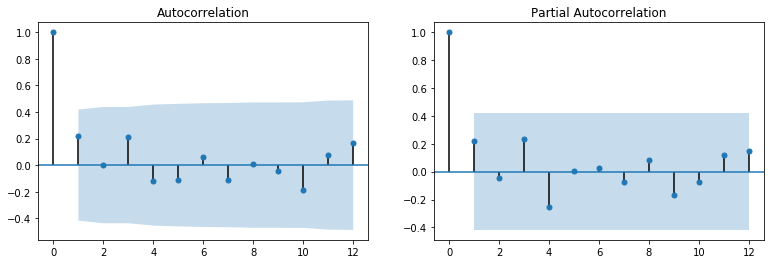

In [227]:
fig = plt.figure(figsize=(13,4))

ax1 = fig.add_subplot(121)
fig = sm.graphics.tsa.plot_acf(stationary_ts, lags=12, ax=ax1)
ax2 = fig.add_subplot(122)
fig = sm.graphics.tsa.plot_pacf(stationary_ts, lags=12, ax=ax2)

## Seasonal ARIMA Model (SARIMA)

### Hyperparameter Optimization

In [228]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [229]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

def hyperparameter_optimization (ts):
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue

In [230]:
hyperparameter_optimization(ts)

ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:474.2519923108149
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:215.191475716679
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:815.5381080229404
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:459.2475872039443
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:556.4835871574844
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:228.47476621126762
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:447.80096395214764
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:196.0580246698212
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:711.8029321742724
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:404.59501886852644
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:468.31374150833557
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:190.73389568340255
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:759.4334221588417
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:454.209784748003
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:468.6981781236152
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:194.70535869008873
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:735.040813180678
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:435.9600476927966
ARIMA(1

The lowest AIC value is: ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:171.01934336728198

This would be the optimal combination of (p, d, q) and (P, D, Q, S) parameters.

In [231]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1,1,1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0484      2.962     -0.354      0.723      -6.854       4.757
ma.L1         -0.3043      1.466     -0.208      0.836      -3.177       2.569
ar.S.L12       0.4111      1.763      0.233      0.816      -3.045       3.867
sigma2      9.765e+07   6.77e-09   1.44e+16      0.000    9.76e+07    9.76e+07


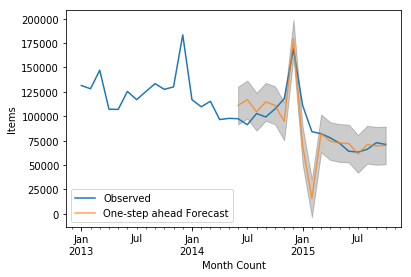

In [234]:
pred = results.get_prediction(start=17, dynamic=False)
pred_ci = pred.conf_int()

ax = ts.plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Month Count')
ax.set_ylabel('Items')
plt.legend()

plt.show()

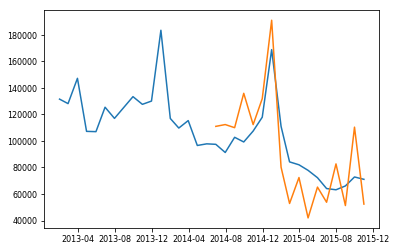

In [235]:
# Regular prediction
forecast = results.predict(start = 17, dynamic= True)  
plt.yticks(size = 8)
plt.xticks(size = 8)
plt.plot(ts)
plt.plot(forecast);

### Train and Test data

In [236]:
train, test = ts[0:-12], ts[-12:] # Use the last 12 months as test

In [237]:
hyperparameter_optimization(train)

ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:208.9573684538945
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:514.4874346632571
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:185.7685831591367
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:257.9213533381658
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:186.4298768625638
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:434.237976652165
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:151.8777624684857
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:201.7693566760876
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:483.7852707259798
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:198.47004672991864
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:203.27396006093608
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:453.65508222293636
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:180.79481107818486
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:202.60727712770307
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:458.64600370494827
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:176.9191295770207
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:180.38209943175468
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:436.039319296805
ARIMA

The lowest AIC value is: ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:151.8777624684857

This would be the optimal combination of (p, d, q) and (P, D, Q, S) parameters.

In [238]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0,1,1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

#print(results.summary().tables[1])
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       item_cnt_day   No. Observations:                   22
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                 -73.939
Date:                            Sun, 12 Aug 2018   AIC                            151.878
Time:                                    19:45:09   BIC                            154.060
Sample:                                01-31-2013   HQIC                           152.392
                                     - 10-31-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4508      0.303     -1.486      0.137      -1.046       0.144
sigma2      1.253e+08   5.72e-10   

### Model Validation

ValueError: operands could not be broadcast together with shapes (9,) (5,) (9,) 

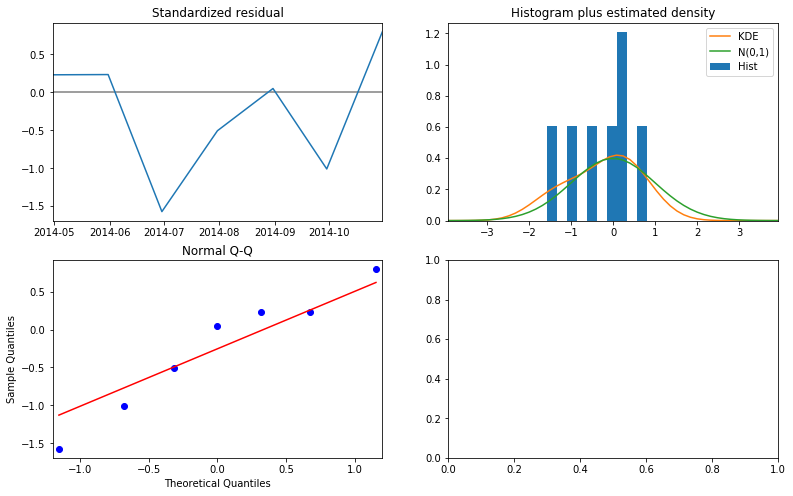

In [239]:
results.plot_diagnostics(figsize=(13, 8))
plt.show()

We need to ensure that the residuals of the model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

**Observations:**

- Top left graph: Does not appear to show an obvious seasonality.
- Top right graph: KDE and N(0,1) are closely aligned. This is a good indication that the residuals are normally distributed with mean 0.
- Bottom left graph: There is no much variance and the residual follow a linear trend. This is a good indication that the residuals are normally distributed.

Our model meets the assumptions and therefore we can safely use it for predictions.

### Prediction - November, December 2015 and January 2016

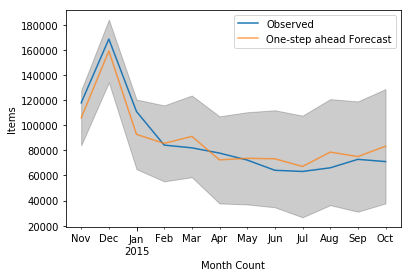

In [240]:
pred = results.get_prediction(start=22, end=33, dynamic=False)
pred_ci = pred.conf_int()

ax = test.plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Month Count')
ax.set_ylabel('Items')
plt.legend()

plt.show()

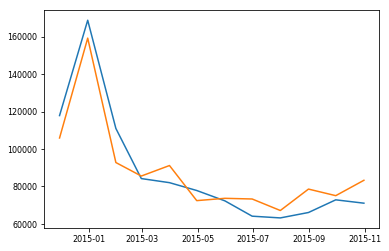

In [241]:
# another option
forecast = results.predict(start=22, end=33, dynamic= True)  
plt.yticks(size = 8)
plt.xticks(size = 8)
plt.plot(test)
plt.plot(forecast);

In [242]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)
print(mse)
print(rmse)

91123052.19248533
9545.839522665638


These are relatively high MSE and RMSE values. We can continue to improve the model. If we add more values to the gridsearch for hyperparameter optimization. However, so far the predicted values are pretty close to the real values.

### Predict November, December 2015, and January 2016

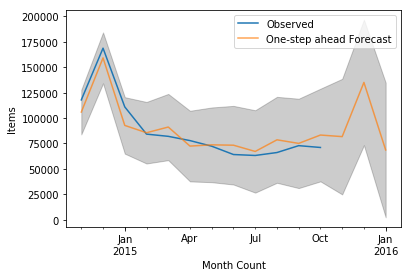

In [243]:
pred = results.get_prediction(start=22, end=36, dynamic=False)
pred_ci = pred.conf_int()

ax = test.plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Month Count')
ax.set_ylabel('Items')
plt.legend()

plt.show()

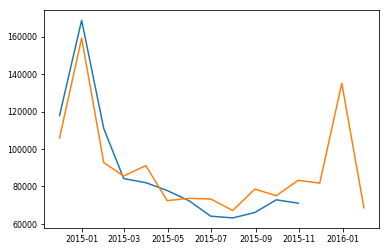

In [244]:
forecast = results.predict(start=22, end=36, dynamic= True)  
plt.yticks(size = 8)
plt.xticks(size = 8)
plt.plot(test)
plt.plot(forecast);

The model is able to predict December correctly, as one might expect based on the original data. Then January 2016 falls lower than the previous January following the downward trend nicely. Overall, I am happy with the results.

# The End

# What did not make the cut:

# ARIMA Model

Now that we have made the Time series stationary, let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values. Original ts for the arima model.

In [397]:
from statsmodels.tsa.arima_model import ARIMA

## AR Model

Text(0.5,1,'RSS: 15871700899.6085')

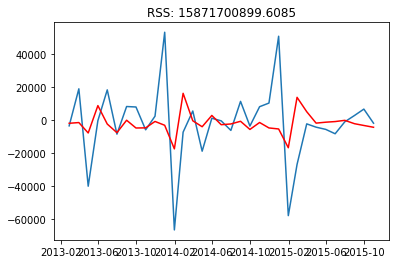

In [407]:
model = ARIMA(ts, order=(1,1,0))  
results_AR = model.fit(disp=-1)  
plt.plot(detrended_ts)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-detrended_ts)**2))

## MA Model

Text(0.5,1,'RSS: 14915925983.0734')

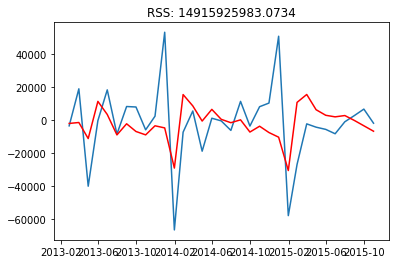

In [408]:
model = ARIMA(ts, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(detrended_ts)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-detrended_ts)**2))

## Combined Model

- p=1 PACF
- d=1 (at least differencing of one to make data stationary)
- q=1 ACF

Text(0.5,1,'RSS: 13073477507.1899')

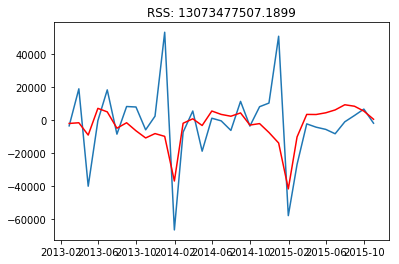

In [409]:
model = ARIMA(ts, order=(1,1,1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(detrended_ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-detrended_ts)**2))
#print(results_ARIMA.summary())

In [410]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.item_cnt_day   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -373.574
Method:                       css-mle   S.D. of innovations          19171.351
Date:                Sat, 11 Aug 2018   AIC                            755.147
Time:                        19:00:36   BIC                            761.133
Sample:                    02-28-2013   HQIC                           757.161
                         - 10-31-2015                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1929.6414    547.476     -3.525      0.001   -3002.675    -856.607
ar.L1.D.item_cnt_day     0.4257      0.163      2.616      0.014       0.107       0.745
ma.L1.D.item

Text(0.5,1,'RMSE: nan')

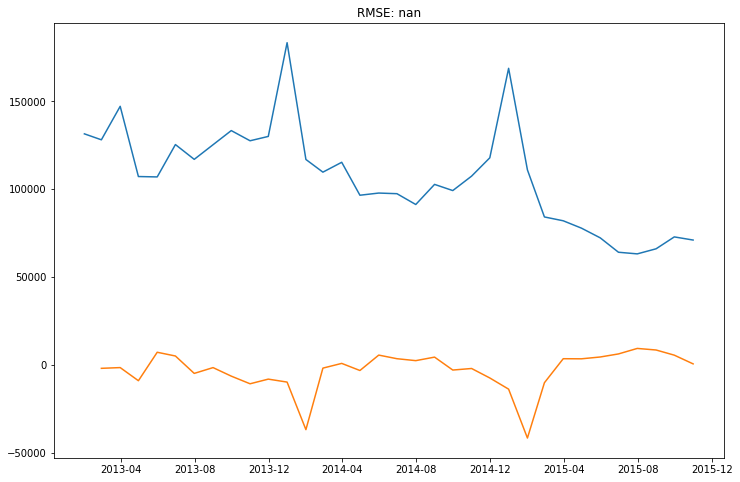

In [419]:
fig = plt.figure(figsize=(12,8))
predictions_ARIMA = (results_ARIMA.fittedvalues)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [420]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

date
2013-02-28   -1929.641379
2013-03-31   -1510.581941
2013-04-30   -8973.130213
2013-05-31    7212.810864
2013-06-30    5084.349968
Freq: M, dtype: float64


In [421]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
2013-02-28    -1929.641379
2013-03-31    -3440.223320
2013-04-30   -12413.353533
2013-05-31    -5200.542669
2013-06-30     -116.192701
Freq: M, dtype: float64


In [422]:
predictions_ARIMA_log = pd.Series(ts.ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2013-01-31    131479.000000
2013-02-28    129549.358621
2013-03-31    128038.776680
2013-04-30    119065.646467
2013-05-31    126278.457331
Freq: M, dtype: float64

Text(0.5,1,'RMSE: inf')

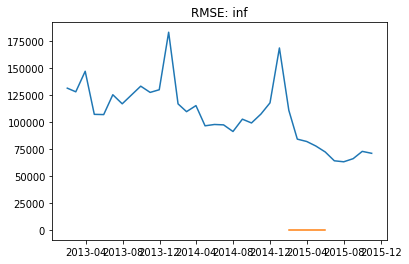

In [423]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

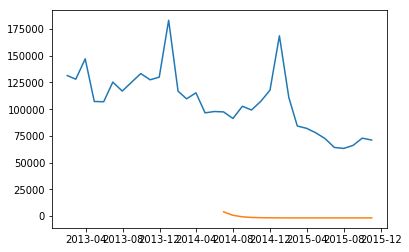

In [414]:
forecast = results_ARIMA.predict(start = 17, dynamic= True)  
plt.plot(ts)
plt.plot(forecast)

                             ARIMA Model Results                              
Dep. Variable:         D.item_cnt_day   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -373.574
Method:                       css-mle   S.D. of innovations          19171.351
Date:                Sat, 11 Aug 2018   AIC                            755.147
Time:                        19:39:13   BIC                            761.133
Sample:                    02-28-2013   HQIC                           757.161
                         - 10-31-2015                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1929.6414    547.476     -3.525      0.001   -3002.675    -856.607
ar.L1.D.item_cnt_day     0.4257      0.163      2.616      0.014       0.107       0.745
ma.L1.D.item

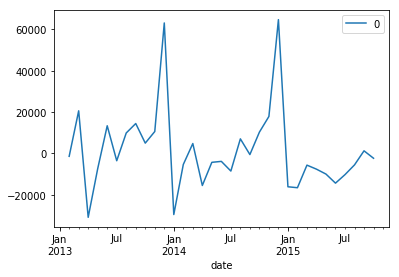

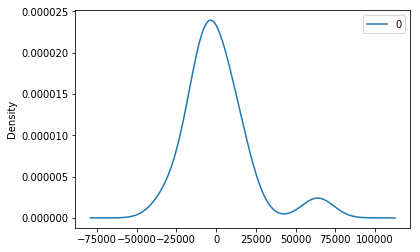

                  0
count     33.000000
mean    1265.765749
std    20171.612270
min   -30978.869787
25%    -8592.658938
50%    -3598.642577
75%     9841.020048
max    64688.869802


In [424]:
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

# plot residual errors
from pandas import DataFrame
from matplotlib import pyplot
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

p-values are under 0.05

In [428]:
#cannot do 1,1,1
train, test = ts[0:-12], ts[-12:]
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit(disp=-1)

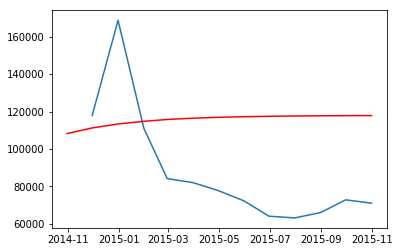

In [431]:
predictions = model_fit.predict(start = 21, end= 33, dynamic= True)  
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
#ts2['forecast'] = model_fit.predict(start = 5, end= 20, dynamic= True)  
#ts2[['item_cnt_day', 'forecast']].plot(figsize=(12, 8))

## Log Transform

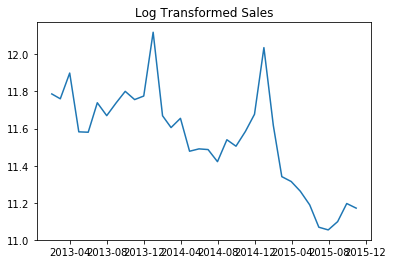

In [27]:
#log transform data to make data stationary on variance
ts_log = np.log(ts)
plt.title ("Log Transformed Sales")
plt.plot(ts_log)

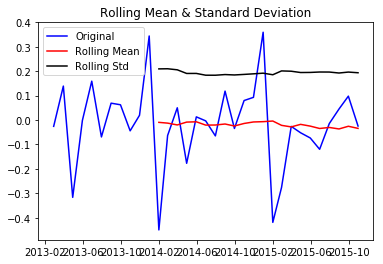

Results of Dickey-Fuller Test:
Test Statistic                -6.974163e+00
p-value                        8.513200e-10
#Lags Used                     1.000000e+01
Number of Observations Used    2.200000e+01
Critical Value (1%)           -3.769733e+00
Critical Value (5%)           -3.005426e+00
Critical Value (10%)          -2.642501e+00
dtype: float64


In [28]:
log_detrended_ts = ts_log - ts_log.shift()

log_detrended_ts.dropna(inplace=True)
test_stationarity(log_detrended_ts)

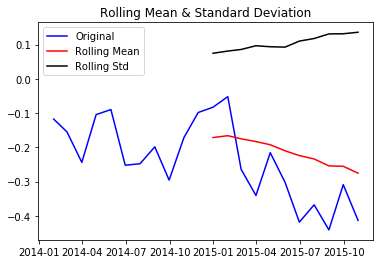

Results of Dickey-Fuller Test:
Test Statistic                 -1.959538
p-value                         0.304591
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [29]:
log_deseasonalized_ts = ts_log - ts_log.shift(12)

log_deseasonalized_ts.dropna(inplace=True)
test_stationarity(log_deseasonalized_ts)

In [30]:
#Difference log transform data to make data stationary on both mean and variance
moving_avg = pd.rolling_mean(ts_log,12)
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
2013-01-31         NaN
2013-02-28         NaN
2013-03-31         NaN
2013-04-30         NaN
2013-05-31         NaN
2013-06-30         NaN
2013-07-31         NaN
2013-08-31         NaN
2013-09-30         NaN
2013-10-31         NaN
2013-11-30         NaN
2013-12-31    0.351833
Freq: M, Name: item_cnt_day, dtype: float64

In [31]:
ts_log_moving_avg_diff.dropna(inplace=True)

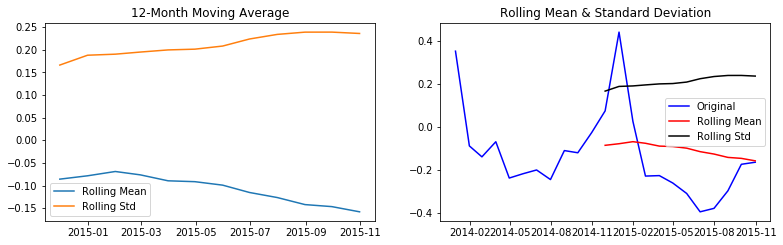

Results of Dickey-Fuller Test:
Test Statistic                 -3.207348
p-value                         0.019563
#Lags Used                      0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [32]:
# De-trended and De-seasonalized Data

plt.figure(figsize=(13,8))

plt.subplot(221)
rolling_stats(ts_log_moving_avg_diff)

plt.subplot(222)
test_stationarity(ts_log_moving_avg_diff)

Transformed rolling values do not appear to have variance, however there seems to be a slight upward(mean)/downward(std) trend. Nonetheless, the test statistic is smaller than the 5% of the critical value so we can say with 95% confidence that this is a stationary series.

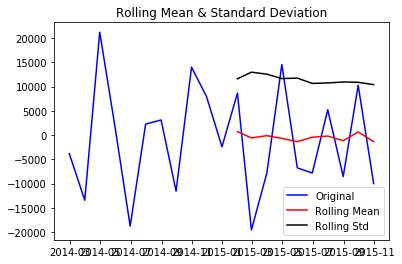

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [23]:
#TEST (IGNORE)
seasonal_first_difference = detrended_ts_diff - detrended_ts_diff.shift(12)

seasonal_first_difference.dropna(inplace=True)
test_stationarity(seasonal_first_difference)

Text(0.5,1,'RSS: 1540935552.2980')

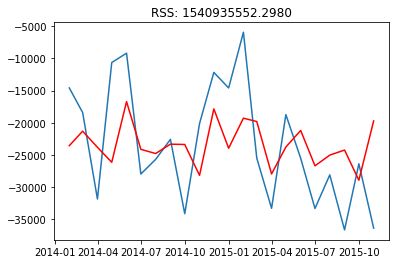

In [146]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(stationary_ts, order=(1,0,1))  
results_ARIMA = model.fit(disp=0)  
plt.plot(stationary_ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-stationary_ts)**2))
#print(results_ARIMA.summary())